# 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
# Veri seti büyüklüğü
n_samples = 1000

In [4]:
data = {
    "yas": np.random.randint(18, 65, n_samples),
    "cinsiyet": np.random.choice(["kadin","erkek"], n_samples),
    "vki": np.random.normal(30, 6, n_samples), # Vücut kitle indeksi (ortalama 30, standart sapma 6)
    "cocuk_sayisi": np.random.randint(0, 6, n_samples),
    "sigara": np.random.choice(["evet", "hayir"], n_samples, p=[0.2, 0.8]),
    "bolge": np.random.choice(["guneybati", "guneydogu", "kuzeybati", "kuzeydogu"], n_samples),
    "masraf": np.random.uniform(2000, 50000, n_samples) # Hedef değişken
}

In [5]:
df = pd.DataFrame(data)

In [6]:
# Sigara içiyorsa mastafı 20.000 - 30.000 arttır
df.loc[df["sigara"] == "evet", "masraf"] += np.random.uniform(20000, 30000, df[df["sigara"] == "evet"].shape[0])

In [7]:
# Yaş arttıkça masraf artsın
df["masraf"] += df["yas"] * 250

In [8]:
# VKI arttıkça masraf biraz artsın
df["masraf"] += df["vki"] * 100

In [9]:
# Veriye ilk bakış
print(df.head())
print("\nVeri Boyutu: ", df.shape)

   yas cinsiyet        vki  cocuk_sayisi sigara      bolge        masraf
0   56    kadin  26.668803             1  hayir  kuzeydogu  51802.376935
1   46    erkek  41.286942             2  hayir  kuzeydogu  62989.849342
2   32    erkek  21.311917             4  hayir  guneybati  44893.134641
3   60    erkek  16.807164             4  hayir  kuzeydogu  34598.325183
4   25    kadin  32.640087             3   evet  guneybati  63142.164925

Veri Boyutu:  (1000, 7)


In [10]:
# Eksik veri kontrolü
print("--- Veri Bilgisi ---")
df.info()

--- Veri Bilgisi ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yas           1000 non-null   int32  
 1   cinsiyet      1000 non-null   object 
 2   vki           1000 non-null   float64
 3   cocuk_sayisi  1000 non-null   int32  
 4   sigara        1000 non-null   object 
 5   bolge         1000 non-null   object 
 6   masraf        1000 non-null   float64
dtypes: float64(2), int32(2), object(3)
memory usage: 47.0+ KB


In [11]:
print("\n--- İstatistiksel Özet ---")
print(df.describe())


--- İstatistiksel Özet ---
               yas          vki  cocuk_sayisi        masraf
count  1000.000000  1000.000000   1000.000000   1000.000000
mean     40.986000    30.341096      2.439000  44109.599890
std      13.497852     6.003673      1.710323  17515.522879
min      18.000000    12.471897      0.000000   9431.885116
25%      29.000000    26.308417      1.000000  30087.288862
50%      42.000000    30.252582      2.000000  43450.906993
75%      52.000000    34.318862      4.000000  56269.493699
max      64.000000    49.158645      5.000000  92357.468460


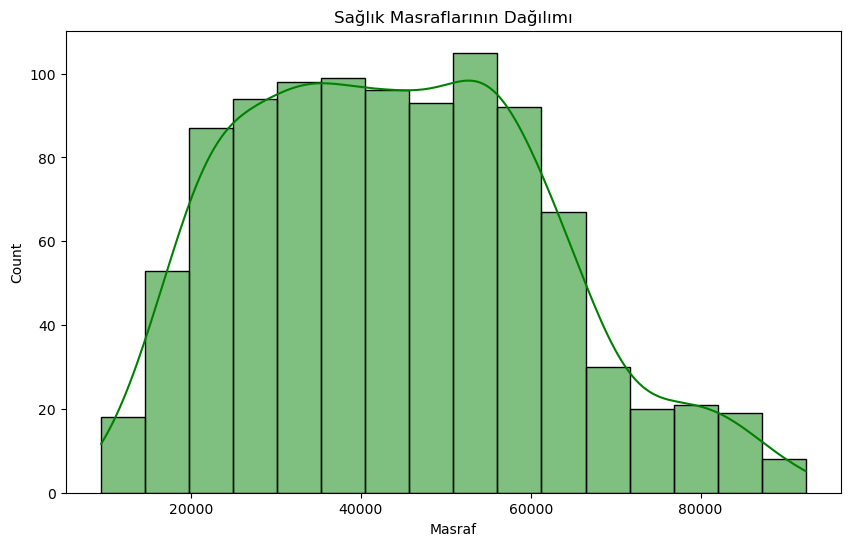

In [12]:
# Masrafın dağılımı
plt.figure(figsize=(10,6))
sns.histplot(df["masraf"], kde = True, color = "green")
plt.title("Sağlık Masraflarının Dağılımı")
plt.xlabel("Masraf")
plt.show()

In [13]:
# Sigara içen vs İçmeyen Sayısı
print("\n--- Sigara Dağılımı ---")
print(df["sigara"].value_counts())


--- Sigara Dağılımı ---
sigara
hayir    802
evet     198
Name: count, dtype: int64


In [14]:
# Hipotez: Sigara içenler ortalama ne kadar ödüyor?
print("--- Sigara Durumuna Göre Ortalama Masraf ---")
# Sigara sütununa göre grupla, masrafın ortalamasını al.
print(df.groupby("sigara")["masraf"].mean())

--- Sigara Durumuna Göre Ortalama Masraf ---
sigara
evet     64671.957089
hayir    39033.107713
Name: masraf, dtype: float64


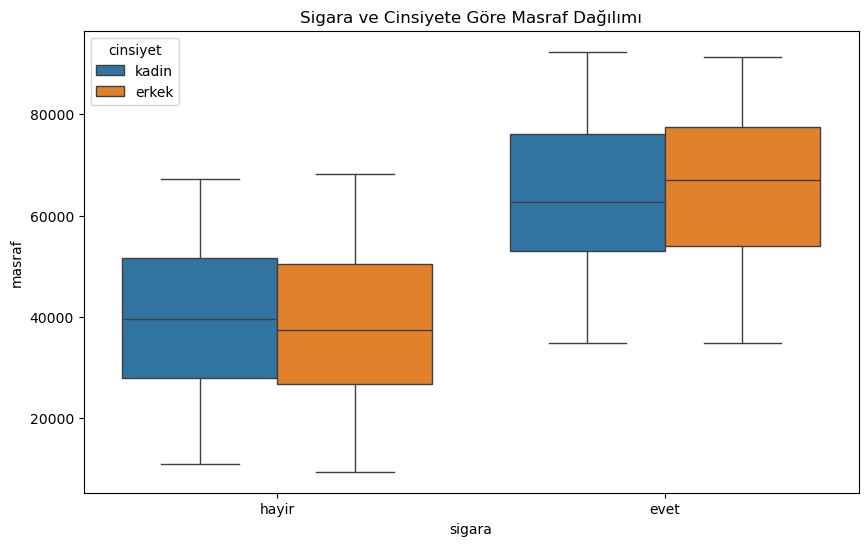

In [15]:
# Medyanı, çeyreklikleri ve aykırı değerleri (outlier) tek bakışta göstermek
plt.figure(figsize=(10,6))
sns.boxplot(x="sigara", y="masraf", data = df , hue="cinsiyet")
plt.title("Sigara ve Cinsiyete Göre Masraf Dağılımı")
plt.show()

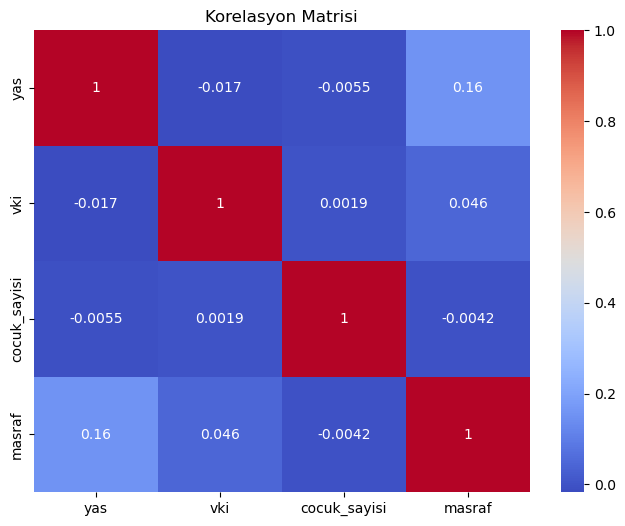

In [16]:
# Korelasyon Matrisi 
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include = ["float64", "int"]).corr(), annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [18]:
# Encoding (Kategorik -> Sayısal)
# Sigara İçin Manuel Mapping
# Evet (Sigara İçiyor) -> 1
# Hayır (İçmiyor) -> 0
mapping_sigara = {'evet': 1, 'hayir': 0}
df['sigara'] = df['sigara'].map(mapping_sigara)

# 2. Cinsiyet İçin de Yapalım (Erkek 1 olsun örneğin)
mapping_cinsiyet = {'erkek': 1, 'kadin': 0}
df['cinsiyet'] = df['cinsiyet'].map(mapping_cinsiyet)

In [19]:
# Bölge nominal olduğu için One-Hot Encoding
df = pd.get_dummies(df, columns=['bolge'], drop_first=True)

In [20]:
X = df.drop("masraf", axis = 1) #Girdiler (Özellikler)
y = df["masraf"]  # Hedef

In [21]:
# Train - Test Split
# Verinin %80'ini eğitime, %20'sini sınav yapmaya ayırıyoruz.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [22]:
print("Eğitim Seti (X_train) Boyutu:", X_train.shape)
print("Test Seti (X_test) Boyutu:", X_test.shape)
print("\n--- İşlenmiş Veriden Örnek ---")
print(X.head())

Eğitim Seti (X_train) Boyutu: (800, 8)
Test Seti (X_test) Boyutu: (200, 8)

--- İşlenmiş Veriden Örnek ---
   yas  cinsiyet        vki  cocuk_sayisi  sigara  bolge_guneydogu  \
0   56         0  26.668803             1       0            False   
1   46         1  41.286942             2       0            False   
2   32         1  21.311917             4       0            False   
3   60         1  16.807164             4       0            False   
4   25         0  32.640087             3       1            False   

   bolge_kuzeybati  bolge_kuzeydogu  
0            False             True  
1            False             True  
2            False            False  
3            False             True  
4            False            False  


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [24]:
# Modeli tanımla
model = LinearRegression()

In [25]:
# Eğit: Modeli X_train ve y_train ile besle
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Tahmin Et: Hiç görmediği X_test verisini verip tahmin iste
y_pred = model.predict(X_test)

In [27]:
# Değerlendirme 
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [28]:
print(f"Model Başarısı (R2 Score): {r2:.4f}")
print(f"Ortalama Hata (MAE): {mae:.2f} TL")

Model Başarısı (R2 Score): 0.3123
Ortalama Hata (MAE): 12888.65 TL


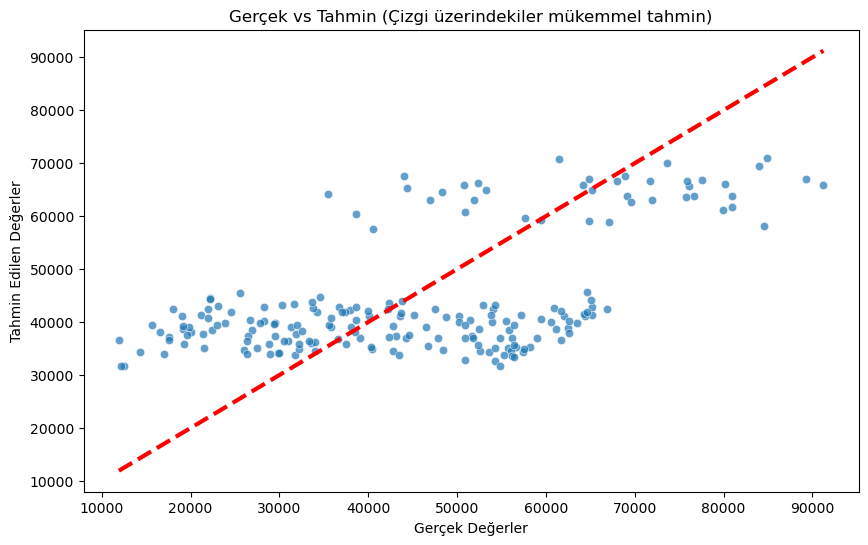

In [29]:
# Görselleştirme: Gerçek vs Tahmin
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=3)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek vs Tahmin (Çizgi üzerindekiler mükemmel tahmin)')
plt.show()

In [30]:
# Katsayılar
importance = pd.DataFrame({'Özellik': X.columns, 'Katsayı (Etki)': model.coef_})
print("\n--- Hangi Özellik Fiyatı Ne Kadar Artırıyor? ---")
print(importance.sort_values(by='Katsayı (Etki)', ascending=False))


--- Hangi Özellik Fiyatı Ne Kadar Artırıyor? ---
           Özellik  Katsayı (Etki)
4           sigara    25839.504713
0              yas      231.317302
2              vki       84.165650
1         cinsiyet     -240.079559
5  bolge_guneydogu     -264.507081
3     cocuk_sayisi     -535.590246
6  bolge_kuzeybati    -1725.910432
7  bolge_kuzeydogu    -2039.781368


In [31]:
# Hatalar (Gerçek - Tahmin)
residuals = y_test - y_pred

Text(0.5, 0, 'Hata Miktarı')

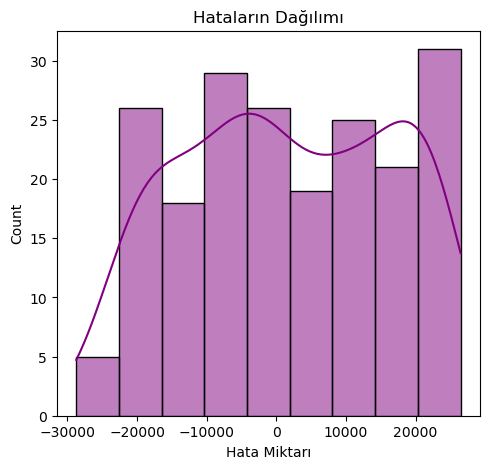

In [32]:
# Hataların Dağılımı
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(residuals, kde = True, color = "purple")
plt.title("Hataların Dağılımı")
plt.xlabel("Hata Miktarı")


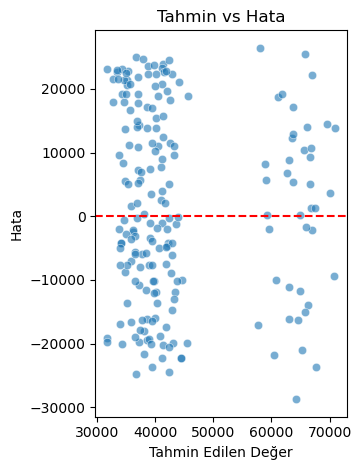

In [33]:
# Tahmin vs Hata
plt.subplot(1,2,2)
sns.scatterplot(x=y_pred, y=residuals, alpha = 0.6)
plt.axhline(y=0, color = "r", linestyle="--") # 0 çizgisi
plt.title("Tahmin vs Hata")
plt.xlabel("Tahmin Edilen Değer")
plt.ylabel("Hata")

plt.tight_layout()
plt.show()